In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
mcts_10 = pd.read_csv("data/random_vs_mcts_10.csv")
mcts_20 = pd.read_csv("data/random_vs_mcts_20.csv")
mcts_50 = pd.read_csv("data/random_vs_mcts_50.csv")
mcts_100 = pd.read_csv("data/random_vs_mcts_100.csv")
mcts_500 = pd.read_csv("data/random_vs_mcts_500.csv")
mcts_1000 = pd.read_csv("data/random_vs_mcts_1000.csv")
mcts_2000 = pd.read_csv("data/random_vs_mcts_2000.csv")
mcts_1000_memory = pd.read_csv("data/random_vs_mcts_1000_memory_1.csv")
mcts_mcts_01_1000 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_1000.csv")
mcts_mcts_01_1000_2_1000_games = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_01_2_1000.csv")
mcts_mcts_02_1000 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_1_1000.csv")
mcts_mcts_02_1000_2 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_2_1000.csv")
mcts_mcts_02_1000_3 = pd.read_csv("data/mcts_no_mem_vs_mcts_agent_02_3_1000.csv")

In [83]:
# mcts_10['iterations'] = 10
# mcts_20['iterations'] = 20
# mcts_50['iterations'] = 50
# mcts_100['iterations'] = 100
# mcts_500['iterations'] = 500
# mcts_1000['iterations'] = 1000
# mcts_2000['iterations'] = 2000
# mcts_1000_memory['iterations'] = 1000
# mcts_mcts_01_1000['iterations'] = 1000
# mcts_mcts_01_1000_2_1000_games['iterations'] = 1000

In [84]:
mcts_10.columns

Index(['Unnamed: 0', 'game_nr', 'num_iter', 'mcts_color', 'winner'], dtype='object')

In [85]:
mcts = [mcts_10,mcts_20, mcts_50, mcts_100, mcts_500, mcts_1000, mcts_2000, mcts_1000_memory, mcts_mcts_01_1000, mcts_mcts_02_1000]

combined_mcts = pd.concat(mcts)

In [86]:
combined_mcts.columns

Index(['Unnamed: 0', 'game_nr', 'num_iter', 'mcts_color', 'winner'], dtype='object')

In [87]:
mcts_10.drop("Unnamed: 0", axis=1, inplace=True)
mcts_20.drop("Unnamed: 0", axis=1, inplace=True)
mcts_50.drop("Unnamed: 0", axis=1, inplace=True)
mcts_100.drop("Unnamed: 0", axis=1, inplace=True)
mcts_500.drop("Unnamed: 0", axis=1, inplace=True)
mcts_1000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_2000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_1000_memory.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_01_1000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_01_1000_2_1000_games.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_02_1000.drop("Unnamed: 0", axis=1, inplace=True)
mcts_mcts_02_1000_2.drop("Unnamed: 0", axis=1, inplace=True)
combined_mcts.drop("Unnamed: 0",axis=1,inplace=True)

In [88]:
combined_mcts

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
2,2,10,white (X),NaN
3,3,10,black (O),black (O)
4,4,10,white (X),NaN
...,...,...,...,...
95,95,1000,black (O),NaN
96,96,1000,white (X),white (X)
97,97,1000,black (O),black (O)
98,98,1000,white (X),black (O)


In [89]:
mcts_10

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
2,2,10,white (X),NaN
3,3,10,black (O),black (O)
4,4,10,white (X),NaN
...,...,...,...,...
95,95,10,black (O),black (O)
96,96,10,white (X),NaN
97,97,10,black (O),black (O)
98,98,10,white (X),NaN


In [90]:
mcts_1000["winner"].isna().sum()

11

In [91]:
mcts_10_wins = mcts_10[mcts_10["winner"] == mcts_10["mcts_color"]].value_counts()
mcts_10_draws = mcts_10["winner"].isna().sum()
mcts_10_losses = mcts_10[mcts_10["winner"] != mcts_10["mcts_color"]].value_counts()

print(f"The MCTS_10 has won {mcts_10_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_10 has tied {mcts_10_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_10 has lost {mcts_10_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_10 has won 49 out of 100 games against Baseline Model.
The MCTS_10 has tied 25 out of 100 games against Baseline Model.
The MCTS_10 has lost 26 out of 100 games against Baseline Model.


In [92]:
mcts_20_wins = mcts_20[mcts_20["winner"] == mcts_20["mcts_color"]].value_counts()
mcts_20_draws = mcts_20["winner"].isna().sum()
mcts_20_losses = mcts_20[mcts_20["winner"] != mcts_20["mcts_color"]].value_counts()

print(f"The MCTS_20 has won {mcts_20_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_20 has tied {mcts_20_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_20 has lost {mcts_20_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_20 has won 57 out of 100 games against Baseline Model.
The MCTS_20 has tied 25 out of 100 games against Baseline Model.
The MCTS_20 has lost 18 out of 100 games against Baseline Model.


In [93]:
mcts_50_wins = mcts_50[mcts_50["winner"] == mcts_50["mcts_color"]].value_counts()
mcts_50_draws = mcts_50["winner"].isna().sum()
mcts_50_losses = mcts_50[mcts_50["winner"] != mcts_50["mcts_color"]].value_counts()

print(f"The MCTS_50 has won {mcts_50_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_50 has tied {mcts_50_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_50 has lost {mcts_50_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_50 has won 54 out of 100 games against Baseline Model.
The MCTS_50 has tied 31 out of 100 games against Baseline Model.
The MCTS_50 has lost 15 out of 100 games against Baseline Model.


In [94]:
mcts_100_wins = mcts_100[mcts_100["winner"] == mcts_100["mcts_color"]].value_counts()
mcts_100_draws = mcts_100["winner"].isna().sum()
mcts_100_losses = mcts_100[mcts_100["winner"] != mcts_100["mcts_color"]].value_counts()

print(f"The MCTS_100 has won {mcts_100_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_100 has tied {mcts_100_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_100 has lost {mcts_100_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_100 has won 70 out of 100 games against Baseline Model.
The MCTS_100 has tied 24 out of 100 games against Baseline Model.
The MCTS_100 has lost 6 out of 100 games against Baseline Model.


In [95]:
mcts_500_wins = mcts_500[mcts_500["winner"] == mcts_500["mcts_color"]].value_counts()
mcts_500_draws = mcts_500["winner"].isna().sum()
mcts_500_losses = mcts_500[mcts_500["winner"] != mcts_500["mcts_color"]].value_counts()

print(f"The MCTS_500 has won {mcts_500_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_500 has tied {mcts_500_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_500 has lost {mcts_500_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_500 has won 79 out of 100 games against Baseline Model.
The MCTS_500 has tied 14 out of 100 games against Baseline Model.
The MCTS_500 has lost 7 out of 100 games against Baseline Model.


In [96]:
mcts_1000_wins = mcts_1000[mcts_1000["winner"] == mcts_1000["mcts_color"]].value_counts()
mcts_1000_draws = mcts_1000["winner"].isna().sum()
mcts_1000_losses = mcts_1000[mcts_1000["winner"] != mcts_1000["mcts_color"]].value_counts()

print(f"The MCTS_1000 has won {mcts_1000_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000 has tied {mcts_1000_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000 has lost {mcts_1000_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000 has won 81 out of 100 games against Baseline Model.
The MCTS_1000 has tied 11 out of 100 games against Baseline Model.
The MCTS_1000 has lost 8 out of 100 games against Baseline Model.


In [97]:
mcts_2000_wins = mcts_2000[mcts_2000["winner"] == mcts_2000["mcts_color"]].value_counts()
mcts_2000_draws = mcts_2000["winner"].isna().sum()
mcts_2000_losses = mcts_2000[mcts_2000["winner"] != mcts_2000["mcts_color"]].value_counts()

print(f"The MCTS_2000 has won {mcts_2000_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_2000 has tied {mcts_2000_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_2000 has lost {mcts_2000_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_2000 has won 85 out of 100 games against Baseline Model.
The MCTS_2000 has tied 13 out of 100 games against Baseline Model.
The MCTS_2000 has lost 2 out of 100 games against Baseline Model.


In [98]:
# Agent 01
# iterations: 1000
# games: 100
# old value structure (-1, 0, 1)
# memory created, updated 0 times
# memory size: 1.12 GB

mcts_1000_memory_wins = mcts_1000_memory[mcts_1000_memory["winner"] == mcts_1000_memory["mcts_color"]].value_counts()
mcts_1000_memory_draws = mcts_1000_memory["winner"].isna().sum()
mcts_1000_memory_losses = mcts_1000_memory[mcts_1000_memory["winner"] != mcts_1000_memory["mcts_color"]].value_counts()

print(f"The MCTS_1000_memory has won {mcts_1000_memory_wins.shape[0]} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has tied {mcts_1000_memory_draws} out of 100 games against Baseline Model.")
print(f"The MCTS_1000_memory has lost {mcts_1000_memory_losses.shape[0]} out of 100 games against Baseline Model.")

The MCTS_1000_memory has won 100 out of 100 games against Baseline Model.
The MCTS_1000_memory has tied 0 out of 100 games against Baseline Model.
The MCTS_1000_memory has lost 0 out of 100 games against Baseline Model.


In [99]:
# Agent 01 
# iterations: 1000
# games: 100
# old value structure (-1, 0, 1)
# memory created, updated 0 times
# memory size: 1.12 GB

mcts_mcts_01_1000_wins = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] == mcts_mcts_01_1000["mcts_color"]].value_counts()
mcts_mcts_01_1000_draws = mcts_mcts_01_1000["winner"].isna().sum()
mcts_mcts_01_1000_losses = mcts_mcts_01_1000[mcts_mcts_01_1000["winner"] != mcts_mcts_01_1000["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000 has won {mcts_mcts_01_1000_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has tied {mcts_mcts_01_1000_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000 has lost {mcts_mcts_01_1000_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_01_1000 has won 50 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has tied 11 out of 100 games against MCTS (no memory).
The MCTS_mcts_01_1000 has lost 39 out of 100 games against MCTS (no memory).


In [100]:
mcts_mcts_01_1000_2_1000_games_wins = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] == mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()
mcts_mcts_01_1000_2_1000_games_draws = mcts_mcts_01_1000_2_1000_games["winner"].isna().sum()
mcts_mcts_01_1000_2_1000_games_losses = mcts_mcts_01_1000_2_1000_games[mcts_mcts_01_1000_2_1000_games["winner"] != mcts_mcts_01_1000_2_1000_games["mcts_color"]].value_counts()

print(f"The MCTS_mcts_01_1000_2_1000_games has won {mcts_mcts_01_1000_2_1000_games_wins.shape[0]} out of 1000 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has tied {mcts_mcts_01_1000_2_1000_games_draws} out of 1000 games against MCTS (no memory).")
print(f"The MCTS_mcts_01_1000_2_1000_games has lost {mcts_mcts_01_1000_2_1000_games_losses.shape[0]} out of 1000 games against MCTS (no memory).")

The MCTS_mcts_01_1000_2_1000_games has won 458 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has tied 140 out of 1000 games against MCTS (no memory).
The MCTS_mcts_01_1000_2_1000_games has lost 402 out of 1000 games against MCTS (no memory).


In [101]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 1 time
# memory size used: 1.15 GB

mcts_mcts_02_1000_wins = mcts_mcts_02_1000[mcts_mcts_02_1000["winner"] == mcts_mcts_02_1000["mcts_color"]].value_counts()
mcts_mcts_02_1000_draws = mcts_mcts_02_1000["winner"].isna().sum()
mcts_mcts_02_1000_losses = mcts_mcts_02_1000[mcts_mcts_02_1000["winner"] != mcts_mcts_02_1000["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000 has won {mcts_mcts_02_1000_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000 has tied {mcts_mcts_02_1000_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000 has lost {mcts_mcts_02_1000_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000 has won 40 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000 has tied 26 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000 has lost 34 out of 100 games against MCTS (no memory).


In [102]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 2 times
# memory size used: 2.03 GB

mcts_mcts_02_1000_2_wins = mcts_mcts_02_1000_2[mcts_mcts_02_1000_2["winner"] == mcts_mcts_02_1000_2["mcts_color"]].value_counts()
mcts_mcts_02_1000_2_draws = mcts_mcts_02_1000_2["winner"].isna().sum()
mcts_mcts_02_1000_2_losses = mcts_mcts_02_1000_2[mcts_mcts_02_1000_2["winner"] != mcts_mcts_02_1000_2["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000_2 has won {mcts_mcts_02_1000_2_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_2 has tied {mcts_mcts_02_1000_2_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_2 has lost {mcts_mcts_02_1000_2_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000_2 has won 48 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_2 has tied 24 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_2 has lost 28 out of 100 games against MCTS (no memory).


In [103]:
# Agent 02 
# iterations: 1000
# games: 100
# updated value structure (0, 0.5, 1)
# memory created, updated 3 times
# memory size used: 2.95 GB

mcts_mcts_02_1000_3_wins = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] == mcts_mcts_02_1000_3["mcts_color"]].value_counts()
mcts_mcts_02_1000_3_draws = mcts_mcts_02_1000_3["winner"].isna().sum()
mcts_mcts_02_1000_3_losses = mcts_mcts_02_1000_3[mcts_mcts_02_1000_3["winner"] != mcts_mcts_02_1000_3["mcts_color"]].value_counts()

print(f"The MCTS_mcts_02_1000_3 has won {mcts_mcts_02_1000_3_wins.shape[0]} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has tied {mcts_mcts_02_1000_3_draws} out of 100 games against MCTS (no memory).")
print(f"The MCTS_mcts_02_1000_3 has lost {mcts_mcts_02_1000_3_losses.shape[0]} out of 100 games against MCTS (no memory).")

The MCTS_mcts_02_1000_3 has won 51 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has tied 23 out of 100 games against MCTS (no memory).
The MCTS_mcts_02_1000_3 has lost 26 out of 100 games against MCTS (no memory).


In [104]:
#mcts

In [105]:
filtered_data = combined_mcts[combined_mcts["winner"] == combined_mcts["mcts_color"]]


In [106]:
filtered_data.head()

,game_nr,num_iter,mcts_color,winner
0,0,10,white (X),white (X)
1,1,10,black (O),black (O)
3,3,10,black (O),black (O)
6,6,10,white (X),white (X)
12,12,10,white (X),white (X)


In [107]:
win_data = combined_mcts[(combined_mcts["mcts_color"] == combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
loss_data = combined_mcts[(combined_mcts["mcts_color"] != combined_mcts["winner"]) & ~combined_mcts["winner"].isna()]
draw_data = combined_mcts[combined_mcts["winner"].isna()]

/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulkotyrba/miniforge3/envs/ds-kickstarter-tensorflow/lib/python3.11/site-packages/s

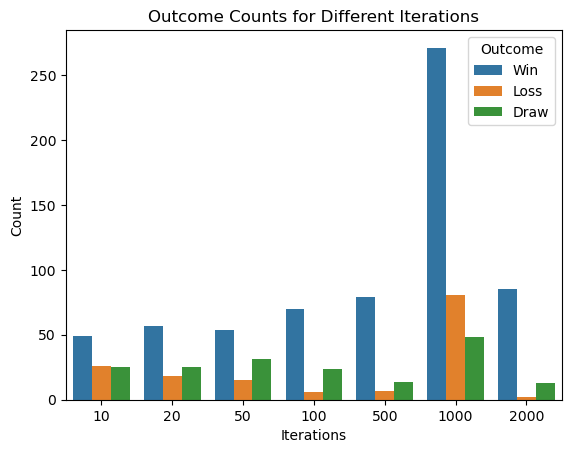

In [108]:

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'num_iter': combined_mcts['num_iter'].unique(),
    'Win': win_data.groupby('num_iter').size(),
    'Loss': loss_data.groupby('num_iter').size(),
    'Draw': draw_data.groupby('num_iter').size().fillna(0)
})

# Melt the DataFrame for Seaborn
plot_data_melted = pd.melt(plot_data, id_vars='num_iter', var_name='Outcome', value_name='Count')

# Create a bar plot
sns.barplot(data=plot_data_melted, x='num_iter', y='Count', hue='Outcome')

# Set plot labels and title
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.title('Outcome Counts for Different Iterations')

# Show the plot
plt.show()